In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"/content/Rpaperdata.csv")

In [3]:
df.sample(5)

,ground,red,yellow,blue,Ir,Iy,Ib,Vr,Vy,Vb,"g,r,y,b_state",line_state,target
6185,1,0,1,1,133.542420,686.546741,57.592870,0.040097,-0.277279,0.237183,"1,0,1,1",unhealthy,1
1624,0,0,0,0,28.785583,-29.656078,-2.313415,0.541684,-0.047493,-0.494191,"0,0,0,0",healthy,0
1564,0,0,0,0,24.602889,61.675753,-89.191453,-0.455629,0.597446,-0.141816,"0,0,0,0",healthy,0
155,0,0,0,0,-70.467800,76.904178,-9.667760,-0.269461,-0.327705,0.597166,"0,0,0,0",healthy,0
3353,0,1,1,0,56.673586,-408.566452,354.544796,0.318874,0.037568,-0.356442,"0,1,1,0",unhealthy,1


In [4]:
df.target.value_counts()

,count
target,
1,5496
0,2365


In [5]:
# X3=df[df.target==1].sample(2365)
# X4=df[df.target==0].sample(2365)

In [6]:
# df1=pd.concat([X3,X4],axis=0)

In [7]:
# df1.target.value_counts().sum

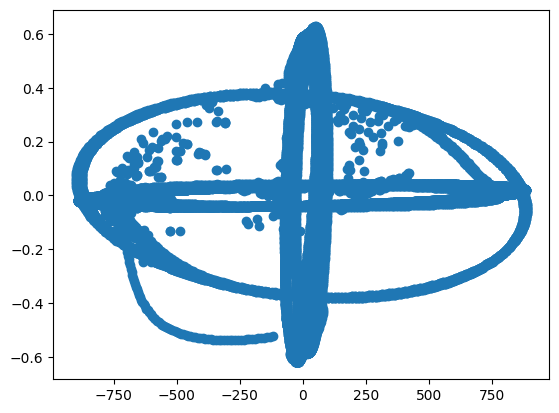

In [8]:
plt.scatter(df.iloc[:,4:6],df.iloc[:,7:9])

In [9]:
df.columns

Index(['ground', 'red', 'yellow', 'blue', 'Ir', 'Iy', 'Ib', 'Vr', 'Vy', 'Vb',
       'g,r,y,b_state', 'line_state', 'target'],
      dtype='object')

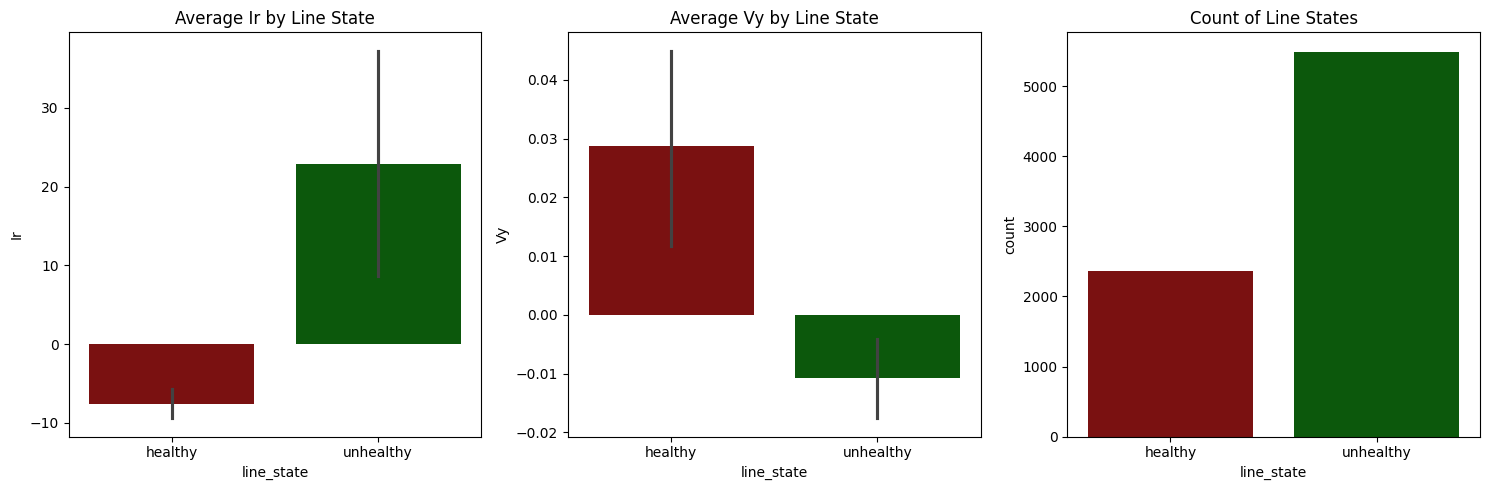

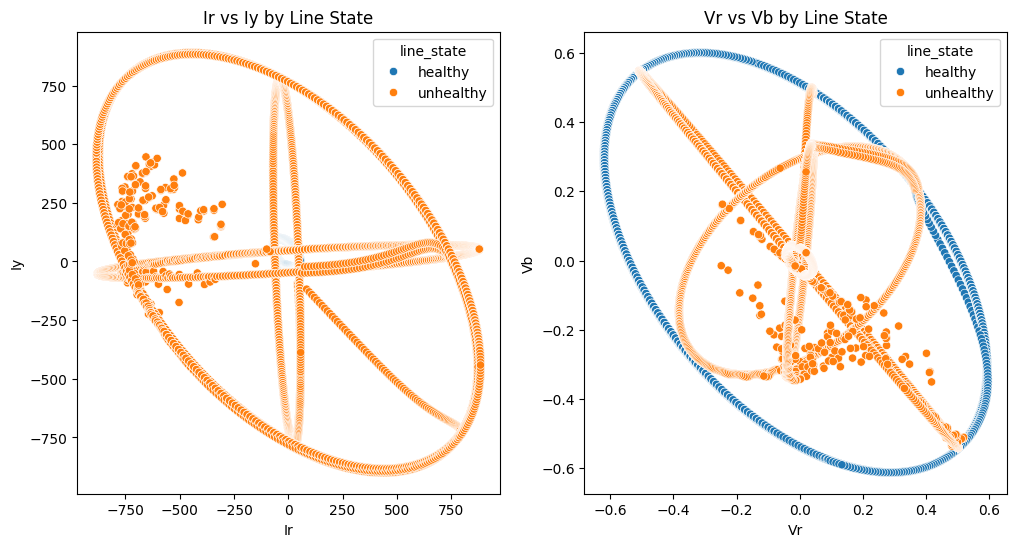

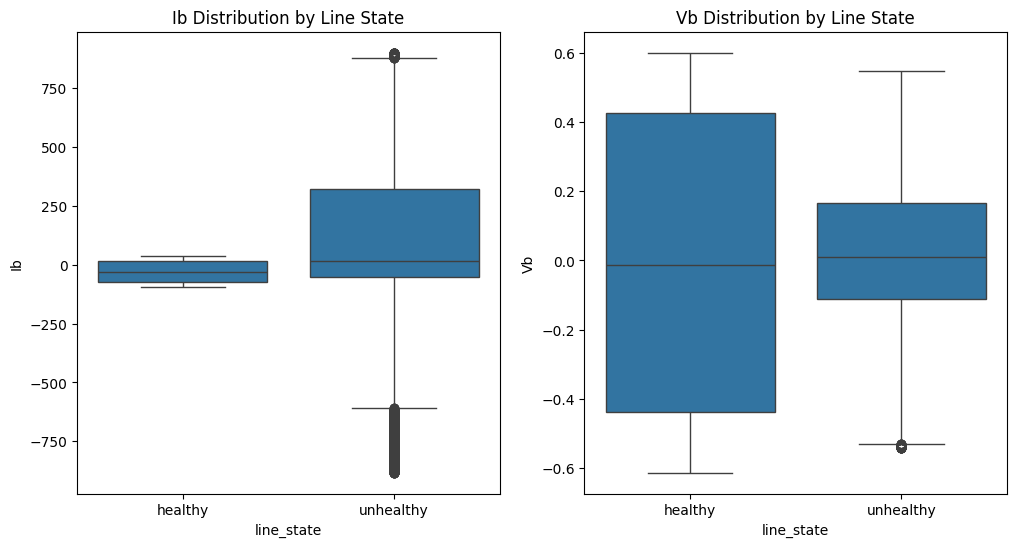

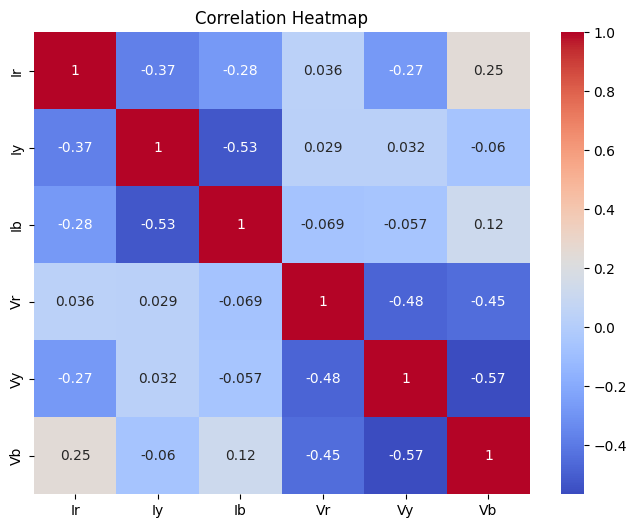

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = df.copy()

# Colors for bar charts(Reddish brown & Dark green)
colors = ["#8B0000", "#006400"]

# Creating our bar charts
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

### Bar Chart 1
sns.barplot(x='line_state', y='Ir', data=df, ax=axes[0], palette=colors, hue='line_state', legend=False)
axes[0].set_title('Average Ir by Line State')

### Bar Chart 2
sns.barplot(x='line_state', y='Vy', data=df, ax=axes[1], palette=colors, hue='line_state', legend=False)
axes[1].set_title('Average Vy by Line State')

### Bar Chart 3:
sns.countplot(x='line_state', data=df, ax=axes[2], palette=colors, hue='line_state', legend=False)
axes[2].set_title('Count of Line States')

plt.tight_layout()
plt.show()

### Scatter Plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Ir', y='Iy', hue='line_state', data=df)
plt.title('Ir vs Iy by Line State')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Vr', y='Vb', hue='line_state', data=df)
plt.title('Vr vs Vb by Line State')
plt.show()

### Box Plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='line_state', y='Ib', data=df)
plt.title('Ib Distribution by Line State')

plt.subplot(1, 2, 2)
sns.boxplot(x='line_state', y='Vb', data=df)
plt.title('Vb Distribution by Line State')
plt.show()

# Heatmap (Correlation)
plt.figure(figsize=(8, 6))
correlation_matrix = df[['Ir', 'Iy', 'Ib', 'Vr', 'Vy', 'Vb']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



In [11]:
X=df[['ground', 'red', 'yellow', 'blue', 'Ir', 'Iy', 'Ib', 'Vr', 'Vy', 'Vb']]
y=df['target']


In [12]:
from sklearn.ensemble import IsolationForest

In [13]:
#contamination =y.mean()

In [14]:
contaminations=0.5

In [15]:
clf= IsolationForest(n_estimators=100,contamination=contaminations)
clf.fit(X)

IsolationForest(contamination=0.5)

In [16]:
df["Anomalies"]=clf.predict(X)

In [17]:
df.sample(7)

,ground,red,yellow,blue,Ir,Iy,Ib,Vr,Vy,Vb,"g,r,y,b_state",line_state,target,Anomalies
1583,0,0,0,0,25.991815,-28.576348,-0.725108,0.551976,-0.075004,-0.476972,"0,0,0,0",healthy,0,1
3560,0,1,1,1,-717.630026,-6.394877,726.203497,0.001532,0.026640,-0.028173,"0,1,1,1",unhealthy,1,1
2543,0,1,1,0,-55.431164,-125.634680,183.497090,-0.502522,-0.041269,0.543790,"0,1,1,0",unhealthy,1,-1
597,0,0,0,0,-52.785519,14.864509,34.947101,0.314129,-0.586814,0.272685,"0,0,0,0",healthy,0,1
4718,1,0,0,1,-635.174403,-13.267958,-32.062024,-0.176512,0.511176,-0.334664,"1,0,0,1",unhealthy,1,-1
6931,1,1,1,1,-703.679844,327.214449,377.135643,-0.062758,0.040622,0.022136,"1,1,1,1",unhealthy,1,1
77,0,0,0,0,-71.386885,75.977598,-7.947763,-0.243833,-0.349912,0.593745,"0,0,0,0",healthy,0,1


In [18]:
df["Anomalies_pred"]=df["Anomalies"].apply(lambda x:0 if x==1 else 1 )

In [19]:
df.sample(5)

,ground,red,yellow,blue,Ir,Iy,Ib,Vr,Vy,Vb,"g,r,y,b_state",line_state,target,Anomalies,Anomalies_pred
7795,1,1,1,1,867.703159,-362.753771,-1.197738,0.023748,-0.311083,0.287335,"1,1,1,1",unhealthy,1,-1,1
2146,0,0,0,0,52.575766,-7.756157,-48.242983,0.249959,0.361189,-0.611148,"0,0,0,0",healthy,0,1,0
4359,0,1,1,1,810.384820,-97.931052,-710.397836,0.033011,-0.039446,0.006435,"0,1,1,1",unhealthy,1,-1,1
6242,1,0,1,1,259.041008,-865.770869,-49.675099,-0.029981,0.136927,-0.106945,"1,0,1,1",unhealthy,1,-1,1
3608,0,1,1,1,-659.978406,-177.176752,839.246963,-0.039626,0.032829,0.006797,"0,1,1,1",unhealthy,1,1,0


In [20]:
f1_score_result=f1_score(df["target"],df["Anomalies_pred"])

Checking the performance of our model through the us of f1_score_result_

In [21]:
f1_score_result

0.7535278514588859

In [22]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE


In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Initializing the model
rf_model = RandomForestClassifier(random_state=42)

# Training the model on the training data
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [25]:
# Using the best parameters found from RandomizedSearchCV
rf_tuned = RandomForestClassifier(
    n_estimators=100,
    max_depth=7,
    min_samples_split=8,
    min_samples_leaf=9,
    max_features='sqrt',
    bootstrap=True,
    random_state=42
)


rf_tuned.fit(X_train, y_train)


y_pred_tuned_rf = rf_tuned.predict(X_test)


accuracy_rf_tuned = accuracy_score(y_test, y_pred_tuned_rf)
print("rf_tuned Accuracy:", accuracy_rf_tuned)


rf_tuned Accuracy: 1.0


In [26]:
X_test.columns

Index(['ground', 'red', 'yellow', 'blue', 'Ir', 'Iy', 'Ib', 'Vr', 'Vy', 'Vb'], dtype='object')

In [27]:
results_df = X_test.copy()
results_df['Actual_Test_Values'] = y_test
results_df['Predicted_Values'] = y_pred_tuned_rf

In [28]:
X_test

,ground,red,yellow,blue,Ir,Iy,Ib,Vr,Vy,Vb
7096,1,1,1,1,-423.788791,-475.361085,899.267112,-0.036328,0.020153,0.016175
1405,0,0,0,0,12.291029,-26.252906,10.518225,0.586292,-0.211207,-0.375085
994,0,0,0,0,-23.003325,97.391233,-77.797446,-0.620748,0.322699,0.298049
2024,0,0,0,0,49.132945,-21.811162,-30.261309,0.364561,0.240583,-0.605144
5620,1,0,1,1,-866.298566,532.806756,-7.360537,-0.015561,0.267541,-0.251980
...,...,...,...,...,...,...,...,...,...,...
7382,1,1,1,1,277.234037,-6.250415,14.066027,0.333107,-0.586879,0.253772
415,0,0,0,0,-62.526989,86.768226,-27.239249,-0.425688,-0.158805,0.584493
7152,1,1,1,1,-296.330532,-572.930515,869.258783,-0.041965,0.015878,0.026087
7085,1,1,1,1,-452.368534,883.165389,-430.798834,0.022142,0.020215,-0.042358


In [29]:
results_df

,ground,red,yellow,blue,Ir,Iy,Ib,Vr,Vy,Vb,Actual_Test_Values,Predicted_Values
7096,1,1,1,1,-423.788791,-475.361085,899.267112,-0.036328,0.020153,0.016175,1,1
1405,0,0,0,0,12.291029,-26.252906,10.518225,0.586292,-0.211207,-0.375085,0,0
994,0,0,0,0,-23.003325,97.391233,-77.797446,-0.620748,0.322699,0.298049,0,0
2024,0,0,0,0,49.132945,-21.811162,-30.261309,0.364561,0.240583,-0.605144,0,0
5620,1,0,1,1,-866.298566,532.806756,-7.360537,-0.015561,0.267541,-0.251980,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7382,1,1,1,1,277.234037,-6.250415,14.066027,0.333107,-0.586879,0.253772,1,1
415,0,0,0,0,-62.526989,86.768226,-27.239249,-0.425688,-0.158805,0.584493,0,0
7152,1,1,1,1,-296.330532,-572.930515,869.258783,-0.041965,0.015878,0.026087,1,1
7085,1,1,1,1,-452.368534,883.165389,-430.798834,0.022142,0.020215,-0.042358,1,1


In [30]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(results_df['Actual_Test_Values'],results_df['Predicted_Values']))

[[ 499    0]
 [   0 1074]]


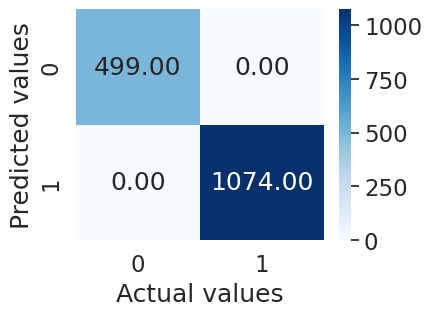

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(results_df['Actual_Test_Values']
            ,results_df['Predicted_Values']),
            annot=True,cmap="Blues", fmt=".2f")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()

In [32]:
rf_tuned.fit(X, y)

RandomForestClassifier(max_depth=7, min_samples_leaf=9, min_samples_split=8,
                       random_state=42)

In [33]:
# Initializing the Logistic Regression model
log_model = LogisticRegression(max_iter=1000, random_state=42)


log_model.fit(X_train, y_train)

test_predict = log_model.predict(X_test)



accuracy_lg_tuned = accuracy_score(y_test, test_predict)
print("log_model Accuracy:", accuracy_lg_tuned)

log_model Accuracy: 1.0


In [34]:
svm_model = SVC(random_state=42)

# Train the model
svm_model.fit(X_train, y_train)
test_predicts = svm_model.predict(X_test)



accuracy_rf_tuned = accuracy_score(y_test, test_predicts)
print("svm_model Accuracy:", accuracy_rf_tuned)

svm_model Accuracy: 0.9707565162110616


In [35]:


# Stacking the base models with Logistic Regression as the meta-model
stacking_models = StackingClassifier(
    estimators=[
        ('rf', rf_tuned),
        ('svm', svm_model)
    ],
    final_estimator= log_model,
    passthrough=False  # If True, features will be concatenated with predictions
)

# Train the stacked model
stacking_models.fit(X_train, y_train)

# Predict and evaluate
y_pred_stack = stacking_models.predict(X_test)
stacking_accuracy = accuracy_score(y_test, y_pred_stack)
print(f"stacking_models Accuracy: {stacking_accuracy}")

stacking_models Accuracy: 1.0


In [36]:
results_df_data = X_test.copy()
results_df_data['Actual_Values'] = y_test
results_df_data['Predicted_Values'] = y_pred_stack

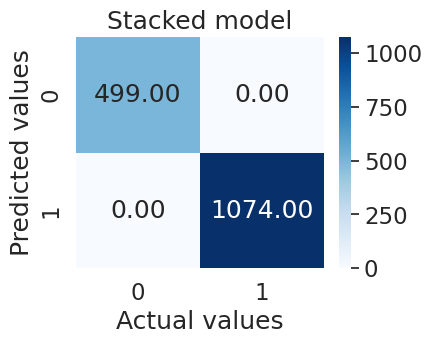

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(results_df_data['Actual_Values']
            ,results_df_data['Predicted_Values']),
            annot=True,cmap="Blues", fmt=".2f")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Stacked model")
plt.show()

In [38]:

results_df_data.sample(5)

,ground,red,yellow,blue,Ir,Iy,Ib,Vr,Vy,Vb,Actual_Values,Predicted_Values
1406,0,0,0,0,12.344793,-30.001774,14.587543,0.589030,-0.222293,-0.366737,0,0
1320,0,0,0,0,5.229722,80.909616,-89.401924,-0.563040,0.516435,0.046606,0,0
3039,0,1,1,0,33.059536,286.119262,-316.558265,0.500956,0.038228,-0.539184,1,1
2676,0,1,1,0,-34.867976,-419.297253,456.418423,-0.492402,-0.033698,0.526099,1,1
4836,1,0,0,1,-417.675628,16.943321,-44.729293,-0.304591,0.599762,-0.295171,1,1


In [39]:
import pickle

In [40]:
with open("Reseach_project_model.pkl","wb") as model_file:
    pickle.dump(stacking_models,model_file)